In [11]:
import torch
import numpy as np

In [3]:
torch.__version__

'1.5.1+cu101'

In [8]:
data=[1,]

In [9]:
print(torch.tensor(data,dtype=None))

tensor([1])


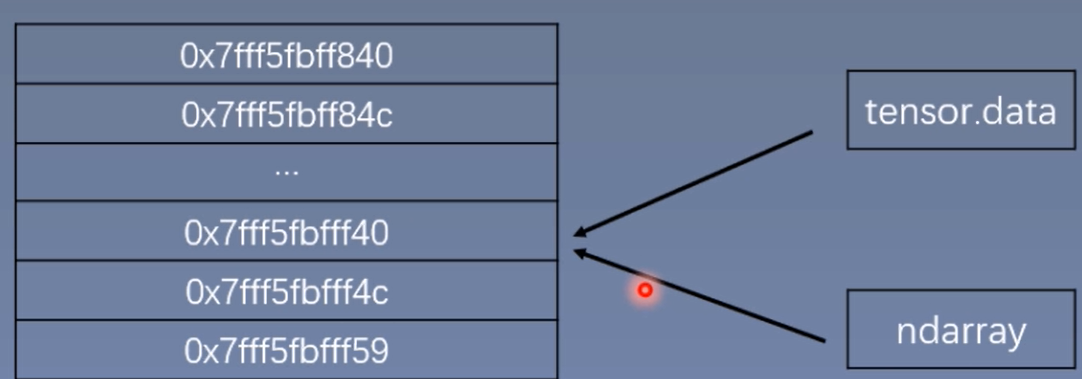

In [14]:
data=np.zeros(4)
data

array([0., 0., 0., 0.])

<font size=5>依据数组创建</font>

In [15]:
#ndarray和tensor共享内存
torch.from_numpy(data)

tensor([0., 0., 0., 0.], dtype=torch.float64)

<font size=5>依据数值创建</font>

In [17]:
torch.zeros((3,3,4),out=None,layout=torch.strided,device=None,requires_grad=False)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [20]:
#左闭右开
torch.arange(0,334,5)

tensor([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
        140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205,
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275,
        280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330])

<font size=5>张量的拼接</font>

In [29]:
data=torch.normal(0,1,size=(1,2),out=None)
data

tensor([[-0.6697, -1.4996]])

In [30]:
torch.cat([data,data],dim=0) #直观理解dim=0就是躺平

tensor([[-0.6697, -1.4996],
        [-0.6697, -1.4996]])

In [31]:
torch.cat([data,data],dim=1) #直观理解就是排队

tensor([[-0.6697, -1.4996, -0.6697, -1.4996]])

<font size=5>张量的拆分</font>

三个参数：
1.input
2.chunks:要切分的份数
3.dim:要切分的维度

In [33]:
torch.chunk(data,chunks=2,dim=1)

(tensor([[-0.6697]]), tensor([[-1.4996]]))

<font size=5>张量的变换</font>

<font color=blue>torch.reshape(input,reshape)</font>

In [34]:
torch.reshape(data,(2,1))

tensor([[-0.6697],
        [-1.4996]])

用-1就不用计算某个具体的维度

In [38]:
torch.reshape(data,(2,-1))

tensor([[-0.6697],
        [-1.4996]])

<font color=blue>torch.transpose(input,交换的维度1，交换的维度2)</font>

图像的预处理使用

In [43]:
data

tensor([[-0.6697, -1.4996]])

In [42]:
torch.transpose(data,0,1)

tensor([[-0.6697],
        [-1.4996]])

<font size=5>张量的压缩</font>

torch.squeeze(input.dim=None,out=None) 

你看 “删去111” 就代表dim=0的时候删除所有张量是1的轴

<font size=5>张量的加法，神经元的激活</font>

<font color=red>一定要输入张量才能计算</font>

In [56]:
data1=torch.randn((1,4))
data2=torch.randn((1,4))

In [60]:
torch.add(data1,10,data2)

tensor([[-10.5669, -14.8587, -15.9396, -14.1978]])

<font size=5>实现线性回归<font>

<font color=red>RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn</font>

solution:需要在创建张量的时候设置<font color=blue>requires_grad=True</font>

<font size=3>
if loss.data.numpy()<1:
    break
设置中止条件
</font>

In [69]:
x=torch.randn(20,1)*10
y=2*x+(5+torch.randn(20,1))

In [72]:
w=torch.randn(1,requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [80]:
for iteration in range(1000):
    lr=0.1
    wx=torch.mul(w,x)
    y_pred = torch.add(wx,b)
    loss = (0.5*(y-y_pred)**2).mean()
    loss.backward()
    b.data.sub_(lr*b.grad)
    w.data.sub_(lr*w.grad)
    if loss.data.numpy()<1:
        break    